# **Earthquake Detection Machine Learning Model**

This machine learning model is trained on Official Dataset from [BHUKOSH - Geological Survey of India](https://bhukosh.gsi.gov.in/Bhukosh/Public).

I have parsed and created the .csv file from .geojson file obtained from the official website.

For the original .geojson and python code to extract data from .geojson file to .csv, refer to this [Github Repository](https://github.com/siyaa-dev/Earthquake-Detection-India.git)

**Importing Dependencies**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

**Importing and Pre-Processing Dataset**

In [121]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Earthquake-Detect/earthquake.csv')

# Define the classification function
def classify_magnitude(mag):
    if mag < 4.2:
        return 'Moderate'
    else:
        return 'Strong'

# Apply the function to create the new classification column
df['earthquake_class'] = df['MAGMB'].apply(classify_magnitude)

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'earthquake_class' column
df['earthquake_class_encoded'] = le.fit_transform(df['earthquake_class'])

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           LAT    LONG_  MAGMB  DEPTH_KM earthquake_class  \
0      36.8529  70.9445    4.8      88.0           Strong   
1      36.8531  70.9009    3.3      88.0         Moderate   
2      36.8579  71.0629    3.3     124.1         Moderate   
3      36.8635  70.9343    3.5     200.0         Moderate   
4      36.8677  71.0729    4.8     150.0           Strong   
...        ...      ...    ...       ...              ...   
35106   9.4890  92.8906    3.9      33.0         Moderate   
35107   9.8285  92.8905    3.8     100.0         Moderate   
35108   9.4104  92.8850    4.4      42.5           Strong   
35109   9.1341  92.8683    4.0      33.0         Moderate   
35110   9.5523  92.8711    4.3      33.0           Strong   

       earthquake_class_encoded  
0                             1  
1                             0  
2                             0  
3 

**Correlation**

This is just to show that there is no correlation between depth and magnitude.

In [122]:
corr_df = df.drop(['LAT', 'LONG_','earthquake_class', 'earthquake_class_encoded'], axis='columns')
correlation = corr_df.corr()

<Axes: >

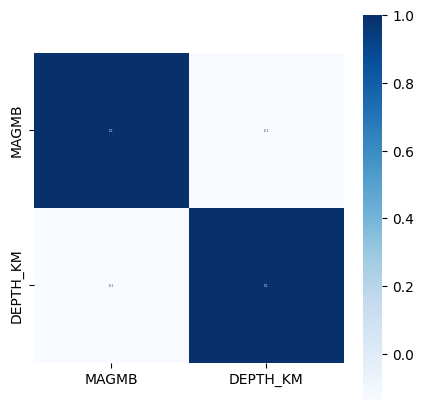

In [123]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':2}, cmap='Blues')

**Defining Inputs and Target for the Model.**

In [124]:
inputs = df.drop(['earthquake_class', 'earthquake_class_encoded', 'MAGMB'], axis='columns')
target = df['earthquake_class_encoded']

**Splliting the Dataset**

80% Training and 20% Testing Dataset

In [125]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.1, random_state=2)

**Training the Model**

In [126]:
# Load RandomForestClassifier
RFCmodel = RandomForestClassifier(min_samples_leaf=5, random_state=42)

# Train the model
RFCmodel.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, random_state=42)

**Evaluation**

Prediction on testing data

In [127]:
y_pred_RFC = RFCmodel.predict(X_test)

In [128]:
# Generate the classification report
report = classification_report(y_test, y_pred_RFC, target_names=['Moderate','Strong'])
print(report)

              precision    recall  f1-score   support

    Moderate       0.66      0.65      0.65      1671
      Strong       0.69      0.70      0.69      1841

    accuracy                           0.67      3512
   macro avg       0.67      0.67      0.67      3512
weighted avg       0.67      0.67      0.67      3512

